In [50]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
credits=pd.read_csv('Кредиты.csv', sep=';')
credits.head()

,CREDIT1,CREDIT2
0,125000,100000
1,100000,150000
2,75000,100000
3,100000,100000
4,150000,100000


In [52]:
# готовая функция
def ttest(first_array, second_array, alpha = 0.05):
    s,p = ttest_ind(first_array,second_array)
    if p>alpha:
        print('Нулевая гипотеза о равенстве средних на основании полученного p_value принята')
        return('Значение двухвыборочного критерия = {0}, p_value = {1}'.format(s,p))
    else:
        print('Нулевая гипотеза о равенстве средних на основании полученного p_value не принимается')
        return('Значение двухвыборочного критерия = {0}, p_value = {1}'.format(s,p))

In [53]:
ttest(credits['CREDIT1'],credits['CREDIT2'])

Нулевая гипотеза о равенстве средних на основании полученного p_value не принимается


'Значение двухвыборочного критерия = -2.1378360559262917, p_value = 0.032675385935666205'

In [88]:
# заполняем значения
sample=[]
i=200
while i<len(credits['CREDIT1']):
    sample.append(i)
    i=i+50
sample.append(len(credits['CREDIT1']))

[200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 833]

In [65]:
df_res=pd.DataFrame(columns = ['sample_size', 'p_value', 'try'])

In [72]:
# используем одновыборочный t-тест и находим размер и p_value
for j in range(1,50):
    for i in sample:
        s,p = ttest_1samp(sample,i)
        df_res=df_res.append({'sample_size':s, 'p_value':p, 'try':j}, ignore_index=True)

In [85]:
#группируем значения и получаем итоговую выборку
df_gr = df_res.groupby('sample_size').mean('p_value').reset_index()

<AxesSubplot:xlabel='sample_size', ylabel='p_value'>

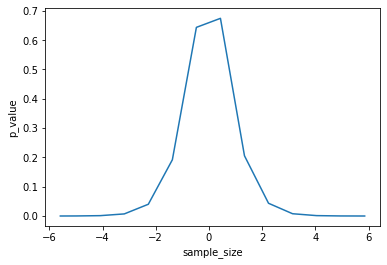

In [86]:
sns.lineplot(x=df_gr['sample_size'], y=df_gr['p_value'])